In [240]:
#import pakages
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [241]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [242]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [244]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [245]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

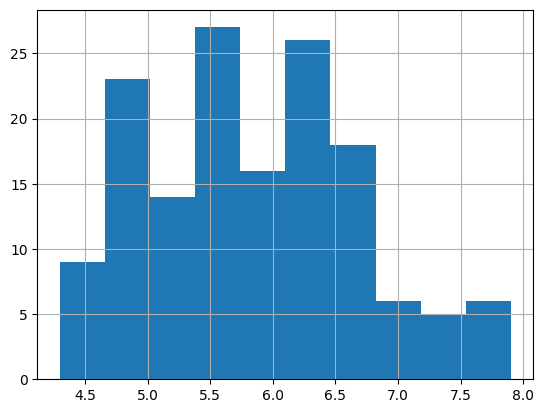

In [246]:
df['sepal_length'].hist()

<Axes: >

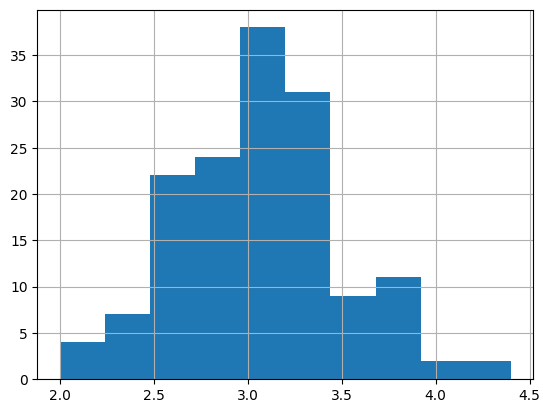

In [247]:
df['sepal_width'].hist()

<Axes: >

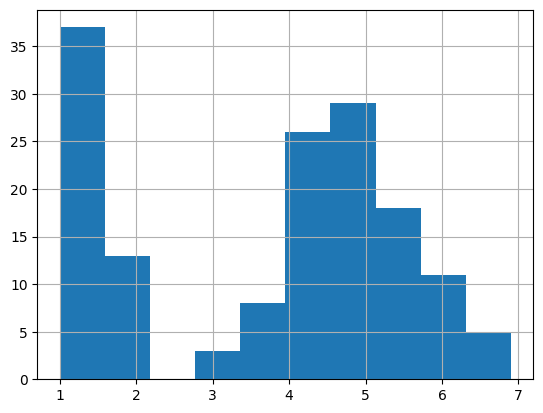

In [248]:
df['petal_length'].hist()

<Axes: >

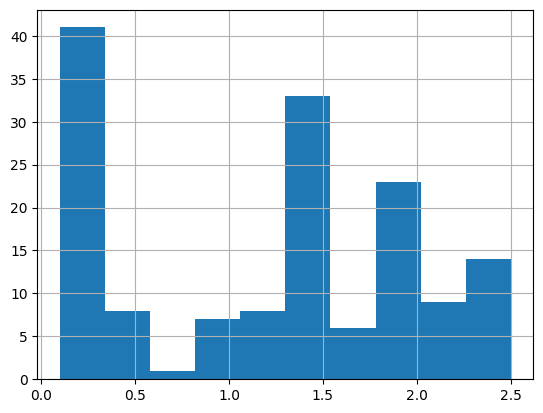

In [249]:
df['petal_width'].hist()

In [250]:
# Define species and colors
species = df['species'].unique()
colors = ['blue', 'yellow', 'red']

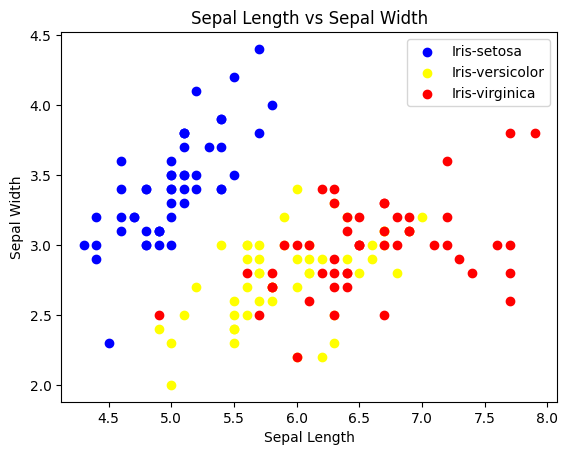

In [251]:
# Plot scatter plot
for i, spec in enumerate(species):
    x = df[df['species'] == spec]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=spec)

# Add labels and legend
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.legend()

# Show plot
plt.show()


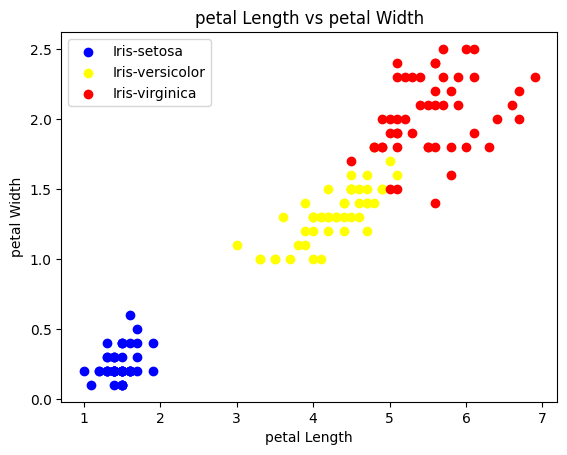

In [252]:
for i,spec in enumerate(species):
  x =df[df['species'] == spec]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label= spec)

# Add labels and legend
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('petal Length vs petal Width')
plt.legend()

# Show plot
plt.show()

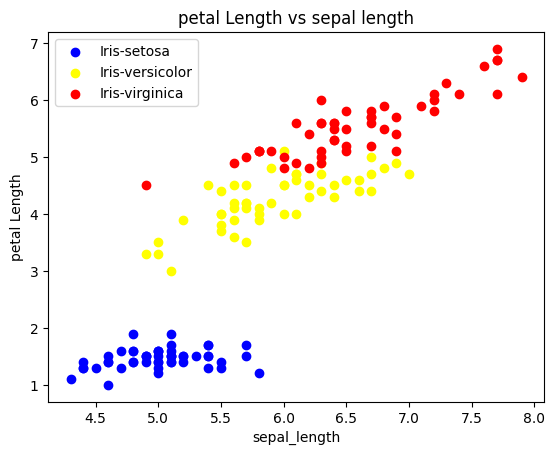

In [253]:
for i,spec in enumerate(species):
  x =df[df['species'] == spec]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label= spec)

# Add labels and legend
plt.xlabel('sepal_length')
plt.ylabel('petal Length')
plt.title('petal Length vs sepal length')
plt.legend()

# Show plot
plt.show()

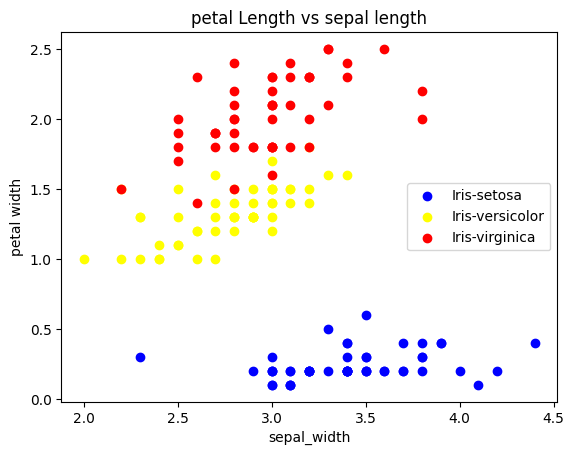

In [254]:
for i,spec in enumerate(species):
  x =df[df['species'] == spec]
  plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label= spec)

# Add labels and legend
plt.xlabel('sepal_width')
plt.ylabel('petal width')
plt.title('petal Length vs sepal length')
plt.legend()

# Show plot
plt.show()

In [255]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


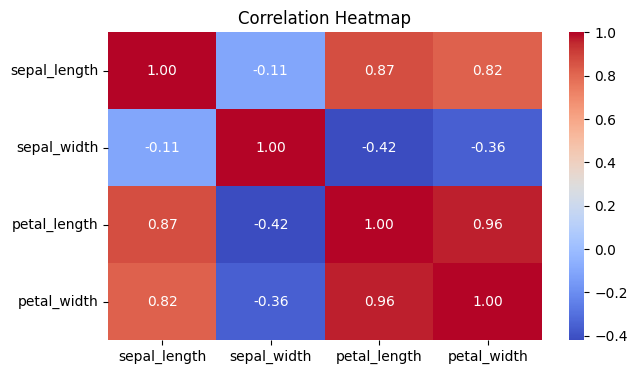

In [256]:
corr = df.corr()
#Heat map
plt.figure(figsize=(7,4))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [257]:
#LabelEncoder
#from sklearn.preprocessing import LabelEncoder
#le =LabelEncoder()
#df['species']=le.fit_transform(df['species'])
#df.head()

In [258]:
#Model Training And Testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

X=df.drop(columns=['species'])
Y=df['species']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)



In [259]:
#Logistic Regression
model = LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy: ", model.score(x_test,y_test)*100)

Logistic Regression Accuracy:  95.55555555555556


In [260]:
#model training
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [261]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [262]:
#K-nearest Neighbours
model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [263]:
print("K-nearest neighbors Accuracy: ",model.score(x_test,y_test)*100)

K-nearest neighbors Accuracy:  93.33333333333333


In [264]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [265]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333


In [266]:
import pickle
filename= "saved_model.sav"
pickle.dump(model,open(filename,'wb'))

In [267]:
import pickle

In [268]:
filename = 'saved_model.sav'
try:
  with open(filename, 'wb') as file:
    pickle.dump(model,file)
  print("Model saved Successfully.")
except Exception as e:
  print(f"Error saving the model: {e}")


Model saved Successfully.


In [269]:
load_model = pickle.load(open(filename,'rb'))

In [270]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [271]:
import sklearn
print(sklearn.__version__)

1.2.2


In [272]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
125,7.2,3.2,6.0,1.8
113,5.7,2.5,5.0,2.0
25,5.0,3.0,1.6,0.2
123,6.3,2.7,4.9,1.8
38,4.4,3.0,1.3,0.2


In [278]:
load_model.predict([[4,2,2,4]])

array(['Iris-virginica'], dtype=object)